In [11]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import custom plotting helper functions
from plotting_helper import parse_age

In [12]:
df = pd.read_csv('../data/data.csv')
df['Age_num'] = df['Age'].apply(parse_age)
df.head()

,Study,Mostly resting state/ Enough Resting State,Study Year,Year of Recruitment,Age,Birth Year,Sex,Handeness,Native English Speaker?,Handedness Score,...,Crosslisted,Scan Time,Clean Scan Time (<0.2 FD),Average FD,Height (inches),Weight (lbs),Last Degree Completed,Months since last psychedleic Exposure,Education (years),Age_num
0,MyConnectome,True,2015,NaN,46,NaN,Male,Right,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
1,Midnight Scan Club,True,2017,NaN,34,NaN,Male,Right,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,34.0
2,Midnight Scan Club,True,2017,NaN,34,NaN,Male,Right,NaN,NaN,...,sub-cast1 (Nico),NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,34.0
3,Midnight Scan Club,True,2017,NaN,29,NaN,Female,Right,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,29.0
4,Midnight Scan Club,True,2017,NaN,28,NaN,Female,Right,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,28.0


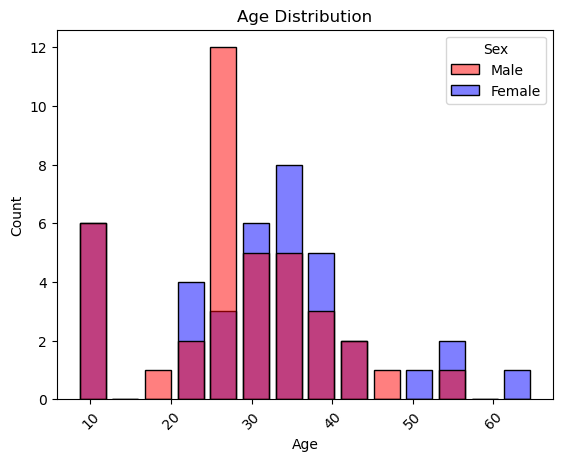

In [13]:
split_by_var = 'Sex'
bin_width = 4

# Create a histogram of age
if split_by_var == None: # Check if we want it split
    sns.histplot(data=df, 
                 x='Age_num', 
                 alpha=1, 
                 color='purple', 
                 binwidth=bin_width
                 )
elif split_by_var not in df.columns: # Check if the split variable is in the dataframe
    raise ValueError(f"Variable '{split_by_var}' not found in DataFrame columns.")
else:
    sns.histplot(data=df, 
                 x='Age_num',
                 binwidth=bin_width,
                 hue=split_by_var, 
                 alpha=0.5, 
                 palette=['red', 'blue'], 
                 shrink=0.8,
                 multiple='layer'
                 )
# Show the plot
plt.title('Age Distribution')
plt.xlabel('Age')
# rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

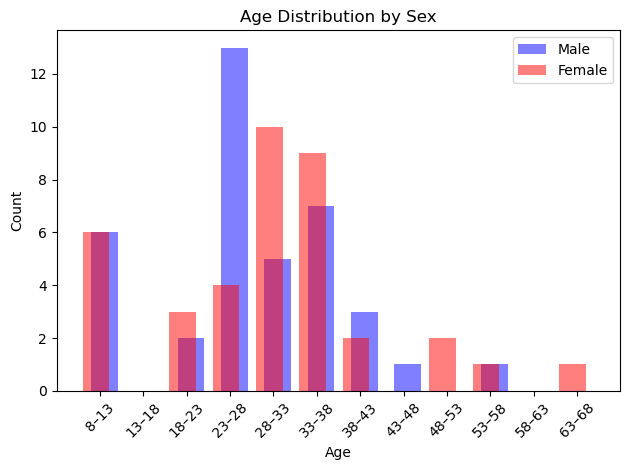

In [16]:
# Settings
bin_width = 5
overlap_fraction = 0.75  # 60% overlap
group_spacing_factor = 1.3  # >1 adds space between bar groups
colors = {'Male': 'blue', 'Female': 'red'}

# Subset groups
groups = df['Sex'].dropna().unique()

# Define bins
min_age = df['Age_num'].min()
max_age = df['Age_num'].max()
bins = np.arange(min_age, max_age + bin_width, bin_width)

# Calculate spacing between bars
adjusted_bin_width = bin_width * group_spacing_factor
offset = bin_width * (1 - overlap_fraction) / 2

# Plot
fig, ax = plt.subplots()

# Adjusted bin centers (more space between groups)
bar_centers = np.arange(len(bins) - 1) * adjusted_bin_width + bins[0] + bin_width / 2

for i, group in enumerate(groups):
    sub_df = df[df['Sex'] == group]
    counts, _ = np.histogram(sub_df['Age_num'], bins=bins)

    shift = (-1)**i * offset  # alternate left/right
    ax.bar(bar_centers + shift, counts,
           width=bin_width * 0.8,
           alpha=0.5,
           color=colors.get(group, 'gray'),
           label=group,
           align='center')

# Labels
ax.set_title('Age Distribution by Sex')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend()

# Use adjusted bin centers for x-axis labels
plt.xticks(bar_centers, labels=[f'{int(b)}–{int(b+bin_width)}' for b in bins[:-1]], rotation=45)

plt.tight_layout()
plt.show()

# Code made with the help of ChatGPT and Github Copilot